In [1]:
%cd ..

/home/work/AnacondaProjects/categorical_bpl


In [2]:
import argparse
import collections
import pyro
import torch
import numpy as np
import data_loader.data_loaders as module_data
import model.model as module_arch
from parse_config import ConfigParser
from trainer import Trainer

In [3]:
%matplotlib inline

In [4]:
torch.autograd.set_detect_anomaly(True)

In [5]:
# fix random seeds for reproducibility
SEED = 123
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(SEED)

In [6]:
Args = collections.namedtuple('Args', 'config resume device')
config = ConfigParser.from_args(Args(config='mnist_config.json', resume=None, device=None))

In [7]:
logger = config.get_logger('train')

In [8]:
# setup data_loader instances
data_loader = config.init_obj('data_loader', module_data)
valid_data_loader = data_loader.split_validation()

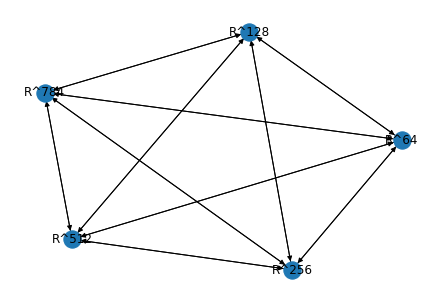

In [9]:
# build model architecture, then print to console
model = config.init_obj('arch', module_arch)
model.draw()

In [10]:
optimizer = pyro.optim.ReduceLROnPlateau({
    'optimizer': torch.optim.Adam,
    'optim_args': {
        "lr": 1e-4,
        "weight_decay": 0,
        "amsgrad": True
    },
    "patience": 20,
    "factor": 0.5,
    "verbose": True,
})

In [11]:
# optimizer = config.init_obj('optimizer', pyro.optim)

In [12]:
trainer = Trainer(model, [], optimizer, config=config,
                  data_loader=data_loader,
                  valid_data_loader=valid_data_loader,
                  lr_scheduler=optimizer)

In [13]:
trainer.train()

Train Epoch: 1 [0/54000 (0%)] Loss: 9951.667969
Train Epoch: 1 [1408/54000 (3%)] Loss: 20145.953125
Train Epoch: 1 [2816/54000 (5%)] Loss: -7962.097656
Train Epoch: 1 [4224/54000 (8%)] Loss: -2746.914062
Train Epoch: 1 [5632/54000 (10%)] Loss: -7774.252930
Train Epoch: 1 [7040/54000 (13%)] Loss: -20732.222656
Train Epoch: 1 [8448/54000 (16%)] Loss: -5636.065430
Train Epoch: 1 [9856/54000 (18%)] Loss: -28350.390625
Train Epoch: 1 [11264/54000 (21%)] Loss: -26584.441406
Train Epoch: 1 [12672/54000 (23%)] Loss: -23316.277344
Train Epoch: 1 [14080/54000 (26%)] Loss: -37661.425781
Train Epoch: 1 [15488/54000 (29%)] Loss: -36423.679688
Train Epoch: 1 [16896/54000 (31%)] Loss: -41786.691406
Train Epoch: 1 [18304/54000 (34%)] Loss: -53540.820312
Train Epoch: 1 [19712/54000 (37%)] Loss: -40059.417969
Train Epoch: 1 [21120/54000 (39%)] Loss: -46349.636719
Train Epoch: 1 [22528/54000 (42%)] Loss: -59281.292969
Train Epoch: 1 [23936/54000 (44%)] Loss: -46640.015625
Train Epoch: 1 [25344/54000 (47%